In [1]:
def func(x,y):
    return np.array([x**2*y,2*x+np.sin(y)])

In [2]:
def func_Jac(x,y):
    return np.array([[2*x*y,x**2],[2,np.cos(y)]])

[ 2.5  4. ]


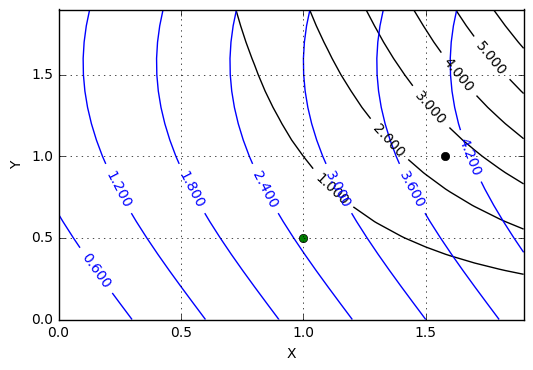

In [3]:
xmin = 0
xmax = 2
ymin = 0
ymax = 2
dx   = 0.1
dy   = 0.1
x   = np.arange(xmin,xmax,dx)
y   = np.arange(ymin,ymax,dy)
X,Y = np.meshgrid(x,y)
f = np.zeros((len(x),len(y)))
g = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        temp   = func(x[i],y[j])
        f[i,j] = temp[0]
        g[i,j] = temp[1]
F = f.T
G = g.T
fig1 = plt.figure()
ax1  = fig1.add_subplot(1,1,1)
CSf  = ax1.contour(X,Y,F,colors='k')
CSg  = ax1.contour(X,Y,G,colors='b')
ax1.clabel(CSf,inline=1,fontsize=10,colors='k')
ax1.clabel(CSg,inline=1,fontsize=10,colors='b')
ax1.grid('on')
x_star, y_star = (1.57829170833,1.00361110653)
x_0, y_0       = (1.0,0.5)
print func(x_star,y_star)
ax1.plot([x_star],[y_star],'ko')
ax1.plot([x_0],[y_0],'go')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
fig1.savefig('c:/Users/Conrad/Documents/GitHub/BlogWyrm/Pictures/Blog Wyrm - Aristotle to Digital/targeting.png')

In [4]:
#0 pick an initial point
x0   = 1.0
y0   = 0.5
diff = 1.0e7
tol  = 1.0e-7

#1 pick the target point
f_targ = 2.5
g_targ = 4

#2 loop until converged
while diff > tol:
    #a find the diff
    f,g    = func(x0,y0)
    df, dg = f-f_targ, g-g_targ
    diff   = np.max([np.abs(df),np.abs(dg)])

    #b get the jacobian
    J = func_Jac(x0,y0)

    #c get the corrections
    temp = np.linalg.inv(J).dot(np.array([[df],[dg]]))
    dx = temp[0][0]
    dy = temp[1][0]

    print x0, y0, f, g, diff
    #d get the new guess
    x0 = x0 - dx
    y0 = y0 - dy
    
print x0, y0, func(x0,y0)

1.0 0.5 0.5 2.4794255386 2.0
0.790995173079 2.70900482692 1.6949521627 2.00121199591 1.99878800409
1.17633249629 1.35628413934 1.87676922044 3.3297453441 0.670254655905
1.55693580624 0.929020490353 2.25199128794 3.91490558476 0.248008712057
1.57548626581 1.0091941984 2.50497841744 3.99737552714 0.00497841743788
1.57828845884 1.00359856837 2.49995847318 3.99998676469 4.15268182801e-05
1.57829170826 1.00361110668 2.50000000014 3.99999999993 1.39202871452e-10
1.57829170833 1.00361110653 [ 2.5  4. ]
